In [42]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as smtsa
import random

In [35]:
Fs = 500;            # Sampling frequency                    
T = 1/Fs;             # Sampling period       
L = 1000;             # Length of signal
t = np.arange(0, L)*T     # Time vector

In [36]:
S = 2.0*np.sin(2*np.pi*t) + 0.7*np.sin(2*np.pi*5*t)
for i in range(len(S)):
    S[i] += random.random()-0.5

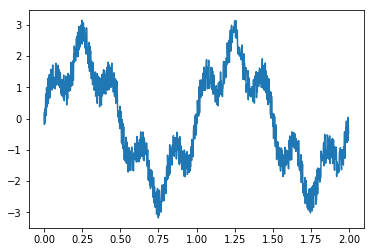

In [37]:
plt.plot(t,S)

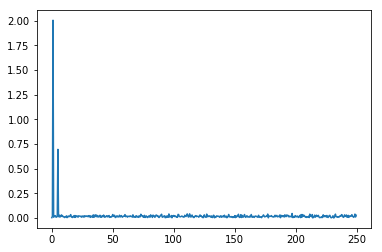

In [74]:
four = np.fft.fft(S)
half = int(len(four)/2)
four = 2*np.absolute(four[:half]/L)
f = Fs*np.arange(0, L/2)/L
plt.plot(f, four)

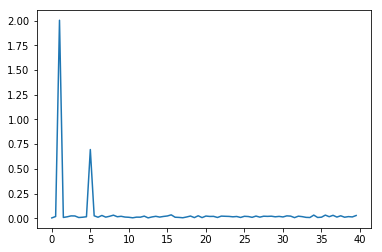

In [73]:
plt.plot(f[0:80], four[0:80])

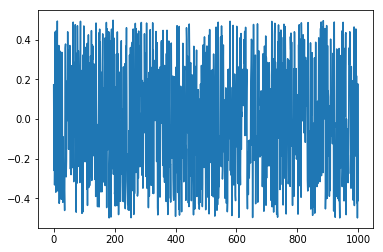

In [48]:
y = S - 2.0*np.sin(2*np.pi*t) - 0.7*np.sin(2*np.pi*5*t)
plt.plot(y)

In [58]:
fit = smtsa.arima_model.ARMA(y, (1, 0)).fit(display=False)

In [61]:
length = len(y)
z = sm.tsa.arma_generate_sample(ar=np.append(1, -fit.arparams), 
                                ma=np.append(1, fit.maparams), 
                                nsample=length, 
                                sigma=np.sqrt(fit.sigma2))

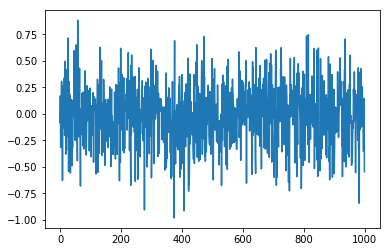

In [62]:
plt.plot(z)

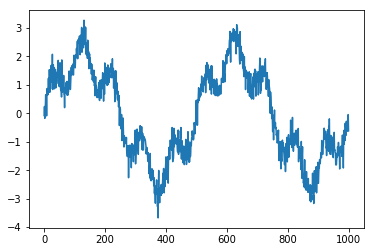

In [64]:
S1 = z + 2.0*np.sin(2*np.pi*t) + 0.7*np.sin(2*np.pi*5*t)
plt.plot(S1)